# PART 1.2

## imports

In [18]:
import numpy as np
import pandas as pd
from pprint import pprint
import seaborn as sns
from pathlib import Path
from datetime import datetime
from enum import Enum
import matplotlib.pyplot as plt
import pandas as pd
# from scipy import stats

sns.set(style="whitegrid")

## Loading data

In [19]:
data_dir = Path('../data')

In [20]:
data_path = data_dir / 'Dataset2.csv'
df = pd.read_csv(data_path)

# Data manipulation

In [21]:
df

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
0,95129,32,39741,10/11/2020,10/31/2020,22.0,2543.0,23.0,2.6,304.7,0.9
1,95129,43,39741,5/30/2021,6/19/2021,NaN,3315.0,14.0,1.1,397.2,0.4
2,95129,40,39741,3/28/2021,4/17/2021,34.0,4816.0,37.0,4.1,577.1,0.8
3,95129,55,39741,2/6/2022,2/26/2022,110.0,10194.0,175.0,13.2,1221.5,1.7
4,95129,44,39741,6/20/2021,7/10/2021,14.0,3033.0,17.0,1.7,363.4,0.6
...,...,...,...,...,...,...,...,...,...,...,...
332,94085,59,23223,1-May,21-May,165.0,2315.0,192.0,33.8,474.7,8.3
333,94085,63,23223,24-Jul,13-Aug,150.0,1348.0,190.0,30.8,276.4,14.1
334,94085,61,23223,12-Jun,2-Jul,219.0,1696.0,255.0,44.9,347.8,15.0
335,94085,27,23223,28-Jun,18-Jul,53.0,1379.0,61.0,10.9,282.8,4.4


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zcta             337 non-null    int64  
 1   time_period      337 non-null    int64  
 2   population       337 non-null    int64  
 3   Start date       337 non-null    object 
 4   end date         337 non-null    object 
 5   case count       311 non-null    float64
 6   test count       325 non-null    float64
 7   positive tests   310 non-null    float64
 8   case rate        337 non-null    float64
 9   test rate        337 non-null    float64
 10  positivity rate  337 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 29.1+ KB


<p> we notice that we have two columns with type object that represents dates, we should transform them into time series </p>

In [23]:
pprint(df['Start date'].unique())

array(['10/11/2020', '5/30/2021', '3/28/2021', '2/6/2022', '6/20/2021',
       '1/16/2022', '5/17/2020', '8/30/2020', '9/20/2020', '9/25/2022',
       '9/12/2021', '11/22/2020', '11/1/2020', '2/14/2021', '6/12/2022',
       '7/3/2022', '10/24/2021', '9/4/2022', '10/3/2021', '6/28/2020',
       '1/24/2021', '4/26/2020', '12/13/2020', '4/5/2020', '1/3/2021',
       '3/15/2020', '2/23/2020', '1/12/2020', '5/9/2021', '5/22/2022',
       '3/7/2021', '8/9/2020', '4/18/2021', '4/10/2022', '7/11/2021',
       '10/16/2022', '12/5/2021', '7/19/2020', '8/22/2021', '8/1/2021',
       '12/26/2021', '2/27/2022', '3/20/2022', '6/7/2020', '5/1/2022',
       '8/14/2022', '11/14/2021', '7/24/2022', '12/22/2019', '5-Apr',
       '22-Nov', '11-Oct', '1-Nov', '9-Aug', '26-Apr', '24-Jul', '14-Nov',
       '28-Mar', '12-Jun', '19-Jul', '7-Mar', '4-Sep', '10-Apr', '30-Aug',
       '28-Jun', '17-May', '16-Oct', '15-Mar', '23-Feb', '2-Feb',
       '20-Jun', '20-Sep', '25-Sep', '14-Feb', '1-May', '3-Jul', '7-Jun

In [24]:
pprint(df['end date'].unique())

array(['10/31/2020', '6/19/2021', '4/17/2021', '2/26/2022', '7/10/2021',
       '2/5/2022', '6/6/2020', '9/19/2020', '10/10/2020', '10/15/2022',
       '10/2/2021', '12/12/2020', '11/21/2020', '3/6/2021', '7/2/2022',
       '7/23/2022', '11/13/2021', '9/24/2022', '10/23/2021', '7/18/2020',
       '2/13/2021', '5/16/2020', '1/2/2021', '4/25/2020', '1/23/2021',
       '4/4/2020', '3/14/2020', '2/1/2020', '5/29/2021', '6/11/2022',
       '3/27/2021', '8/29/2020', '5/8/2021', '4/30/2022', '7/31/2021',
       '11/5/2022', '12/25/2021', '8/8/2020', '9/11/2021', '8/21/2021',
       '1/15/2022', '3/19/2022', '4/9/2022', '6/27/2020', '5/21/2022',
       '9/3/2022', '12/4/2021', '8/13/2022', '1/11/2020', '25-Apr',
       '12-Dec', '31-Oct', '21-Nov', '29-Aug', '16-May', '13-Aug',
       '4-Dec', '17-Apr', '2-Jul', '8-Aug', '27-Mar', '24-Sep', '30-Apr',
       '19-Sep', '18-Jul', '6-Jun', '5-Nov', '4-Apr', '14-Mar', '22-Feb',
       '10-Jul', '10-Oct', '15-Oct', '6-Mar', '21-May', '23-Jul',
     

we notice that we have different format of dates, we should fix that

In [25]:
def transform_date(input_df: pd.DataFrame, date_column: list[str]) -> pd.DataFrame:
    current_year = datetime.now().year

    for column in date_column:
        formatted_dates = []
        for date in input_df[column]:
            try:
                formatted_date = datetime.strptime(f'{date}-{current_year}', '%d-%b-%Y').strftime('%m/%d/%Y')
            except ValueError:
                formatted_date = date
            formatted_dates.append(formatted_date)
        input_df[column] = pd.to_datetime(formatted_dates, format='%m/%d/%Y')
    input_df = input_df.sort_values(by=date_column)
    return input_df


In [26]:
df = transform_date(df, ['Start date', 'end date'])
df

,zcta,time_period,population,Start date,end date,case count,test count,positive tests,case rate,test rate,positivity rate
73,95128,18,36975,2019-12-22,2020-01-11,0.0,NaN,NaN,0.0,0.3,0.0
112,95127,18,66256,2019-12-22,2020-01-11,0.0,NaN,NaN,0.0,0.1,0.0
27,95129,19,39741,2020-01-12,2020-02-01,0.0,NaN,NaN,0.0,0.1,0.0
26,95129,21,39741,2020-02-23,2020-03-14,NaN,NaN,NaN,0.2,0.4,66.7
72,95128,21,36975,2020-02-23,2020-03-14,NaN,NaN,NaN,0.3,0.9,28.6
...,...,...,...,...,...,...,...,...,...,...,...
260,94086,18,50477,2023-12-22,2023-01-11,0.0,NaN,NaN,0.0,0.1,0.0
314,94085,18,23223,2023-12-22,2023-01-11,0.0,NaN,NaN,0.0,0.2,100.0
235,94087,53,56668,2023-12-26,2023-01-15,1659.0,16561.0,1951.0,139.4,1391.6,11.8
284,94086,53,50477,2023-12-26,2023-01-15,1347.0,11252.0,1523.0,127.1,1061.5,13.5


In [27]:
pprint(df['end date'].unique())

<DatetimeArray>
['2020-01-11 00:00:00', '2020-02-01 00:00:00', '2020-03-14 00:00:00',
 '2020-04-04 00:00:00', '2020-04-25 00:00:00', '2020-05-16 00:00:00',
 '2020-06-06 00:00:00', '2020-06-27 00:00:00', '2020-07-18 00:00:00',
 '2020-08-08 00:00:00', '2020-08-29 00:00:00', '2020-09-19 00:00:00',
 '2020-10-10 00:00:00', '2020-10-31 00:00:00', '2020-11-21 00:00:00',
 '2020-12-12 00:00:00', '2021-01-02 00:00:00', '2021-01-23 00:00:00',
 '2021-02-13 00:00:00', '2021-03-06 00:00:00', '2021-03-27 00:00:00',
 '2021-04-17 00:00:00', '2021-05-08 00:00:00', '2021-05-29 00:00:00',
 '2021-06-19 00:00:00', '2021-07-10 00:00:00', '2021-07-31 00:00:00',
 '2021-08-21 00:00:00', '2021-09-11 00:00:00', '2021-10-02 00:00:00',
 '2021-10-23 00:00:00', '2021-11-13 00:00:00', '2021-12-04 00:00:00',
 '2021-12-25 00:00:00', '2022-01-15 00:00:00', '2022-02-05 00:00:00',
 '2022-02-26 00:00:00', '2022-03-19 00:00:00', '2022-04-09 00:00:00',
 '2022-04-30 00:00:00', '2022-05-21 00:00:00', '2022-06-11 00:00:00',
 '20

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 337 entries, 73 to 324
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   zcta             337 non-null    int64         
 1   time_period      337 non-null    int64         
 2   population       337 non-null    int64         
 3   Start date       337 non-null    datetime64[ns]
 4   end date         337 non-null    datetime64[ns]
 5   case count       311 non-null    float64       
 6   test count       325 non-null    float64       
 7   positive tests   310 non-null    float64       
 8   case rate        337 non-null    float64       
 9   test rate        337 non-null    float64       
 10  positivity rate  337 non-null    float64       
dtypes: datetime64[ns](2), float64(6), int64(3)
memory usage: 31.6 KB


In [29]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df = df[df['test count'] >= df['positive tests']]
df = df.groupby(['Start date', 'end date']).sum().reset_index()[['Start date', 'end date', 'test count', 'case count', 'positive tests']]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Start date      92 non-null     datetime64[ns]
 1   end date        92 non-null     datetime64[ns]
 2   test count      92 non-null     float64       
 3   case count      92 non-null     float64       
 4   positive tests  92 non-null     float64       
dtypes: datetime64[ns](2), float64(3)
memory usage: 3.7 KB


In [31]:
def treat_outliers(input_df: pd.DataFrame) -> pd.DataFrame:
    copy_df = input_df.copy()
    def treat_column(col : str):
        q1 = copy_df[col].quantile(0.25)
        q3 = copy_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        copy_df[col] = copy_df[col].apply(lambda x: x if lower_bound <= x <= upper_bound else np.nan)

    numeric_columns = copy_df.select_dtypes(include='number').columns
    for column in numeric_columns:
        treat_column(column)

    copy_df.fillna(copy_df.median(), inplace=True)
    return copy_df

In [32]:
# df = treat_outliers(df)

In [33]:
class PlotType(Enum):
    LINE = 'line plot'

def plot(input_df, *, plot_type: PlotType) -> None:
    plt.figure(figsize=(12, 6))
    match plot_type:
        case PlotType.LINE:
            sns.lineplot(x=input_df['Start date'], y=input_df['test count'], label='Tests')
            sns.lineplot(x=input_df['Start date'], y=input_df['case count'], label='Confirmed Cases')
            sns.lineplot(x=input_df['Start date'], y=input_df['positive tests'], label='Positive Tests')
            plt.xlabel('Time')
            plt.ylabel('Count')
    plt.title('Evolution of COVID-19 Tests and Cases Over Time')
    plt.legend()
    plt.show()

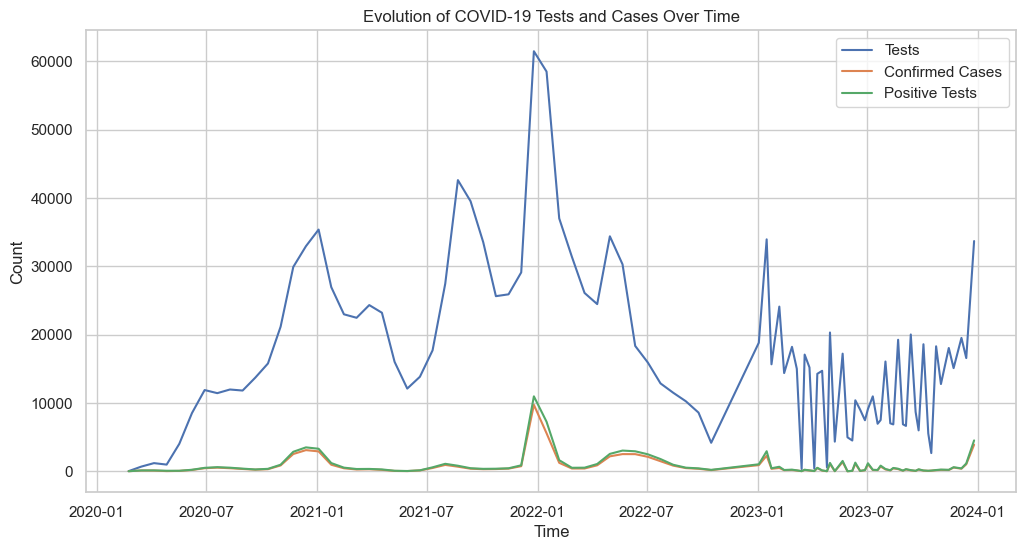

In [34]:
plot(df, plot_type=PlotType.LINE)